Лабораторная работа №6

Вариант №17

Выполнил Плешко Георгий

6.1.17, 6.3.6, 6.5.6, 6.6.17, 6.9.17

In [31]:
from IPython.display import Image

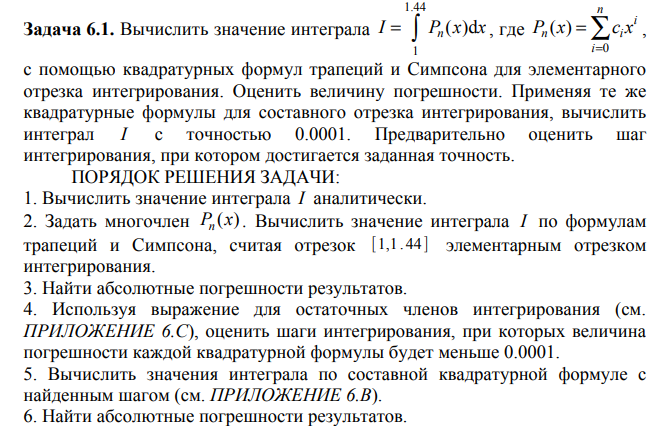

In [34]:
Image("6_1.png")

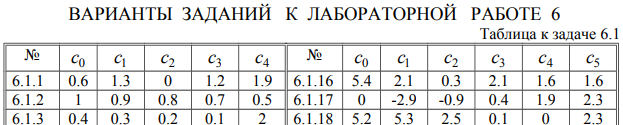

In [35]:
Image("6_1_2.png")

In [2]:
from scipy import optimize
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import sympy
%matplotlib notebook

In [4]:
def Pn(x):
    return ( - 2.9*x - 0.9*x**2 + 0.4*x**3 + 1.9*x**4 + 2.3*x**5)

#Аналитическое вычисление интеграла
ans, err = integrate.quad(Pn, 1, 1.44)
print(ans)
print(err)

3.184831508343465
3.5358732701145815e-14


In [5]:
#Вычисление методом трапеций с относительной погрешностью
def trapec(Pn, x1, x2, n):
    h = abs(x1-x2)/n
    x = []
    for i in range(n+1):
        x.append(x1+i*h)
    f = []
    for j in range(1,n):
        f.append(2*Pn(x[j]))
    return h/2*(Pn(x1)+sum(f) + Pn(x2))

ans1 = trapec(Pn, 1, 1.44, 100)
err1 = ans-ans1
print(ans1)
print(err1)

3.1849178824013102
-8.637405784517327e-05


In [6]:
#Вычисление методом Симпсона с относительной погрешностью
def Simpson(Pn, x1, x2, n):
    h = abs(x1-x2)/(2*n)
    x = []
    for i in range(2*n+1):
        x.append(x1+i*h)
    f = []
    for j in range(1,n+1):
        f.append(4*Pn(x[2*j-1]))
        if not (j == n):
            f.append(2*Pn(x[2*j]))
    return h/3*(Pn(x1)+sum(f)+Pn(x2))

ans2 = Simpson(Pn, 1, 1.44, 100)
err2 = ans-ans2
print(ans2)
print(err2)

3.1848315083653596
-2.1894486224027787e-11


In [7]:
def M2(x):
    return (-1.8 + 6*2.4*x + 12*1.9*x**2 + 20*2.3*x**3)
h1 = math.sqrt(0.0001*12/(abs(M2(optimize.fminbound(lambda x: -M2(x), 1, 1.44))))*(1.44-1))
print(h1)

0.001610505248884133


In [8]:
n1 = 0.44/h1
print(n1)
ans11 = trapec(Pn, 1, 1.44, 172)
err11 = ans-ans11
print(ans11)
print(err11)

273.2061881231755
3.1848607045697412
-2.9196226276173576e-05


In [9]:
def M4(x):
    return (24*1.9 + 120*2.3*x)
h2 = math.sqrt(math.sqrt(0.0001*2880/(M4(optimize.fminbound(lambda x: -M4(x), 1, 1.44)))*(1.44-1)))
print(h2)
n2 = 0.44/h2
print(n2)
ans22 = Simpson(Pn, 1, 1.44, 3)
err22 = ans-ans22
print(ans22)
print(err22)

0.13004713651827746
3.3833886064700875
3.184858536280176
-2.7027936710943834e-05


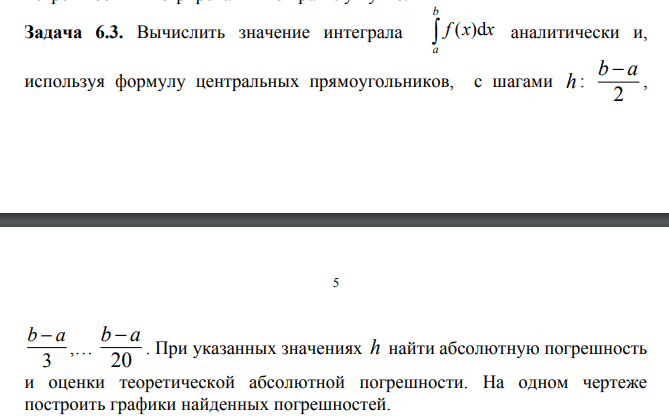

In [36]:
Image("6_3.png")

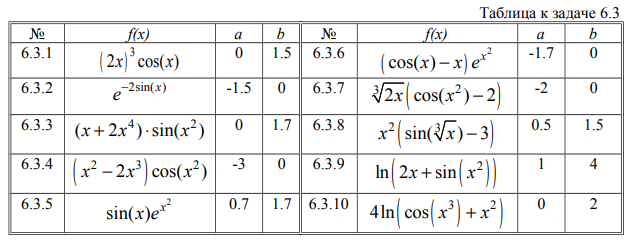

In [37]:
Image("6_3_2.png")

(10.24177624876237, 1.137065580443505e-13)
Шаги [0.85       0.56666667 0.425      0.34       0.28333333 0.24285714
 0.2125     0.18888889 0.17       0.15454545 0.14166667 0.13076923
 0.12142857 0.11333333 0.10625    0.1        0.09444444 0.08947368
 0.085     ]
Результат [ 8.12672625  9.14621251  9.58600035  9.80896457  9.93596048 10.0146854
 10.06668525 10.10275931 10.12877818 10.1481464  10.16294495 10.17450232
 10.1836982  10.19113346 10.19722968 10.2022896  10.20653514 10.21013191
 10.2132055 ]
Абсолютная погрешность [2.11497375 1.09548749 0.65569965 0.43273543 0.30573952 0.2270146
 0.17501475 0.13894069 0.11292182 0.0935536  0.07875505 0.06719768
 0.0580018  0.05056654 0.04447032 0.0394104  0.03516486 0.03156809
 0.0284945 ]
Оценки теоретической погрешности [11.59238666  7.72825777  5.79619333  4.63695466  3.86412889  3.31211047
  2.89809667  2.57608592  2.31847733  2.10770667  1.93206444  1.7834441
  1.65605524  1.54565155  1.44904833  1.3638102   1.28804296  1.22025123
  1.15923

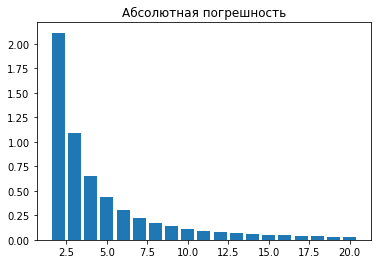

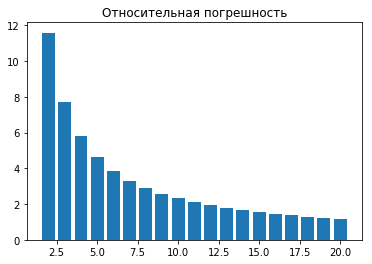

In [28]:
def f(x):
    return (np.cos(x) - x) * sympy.exp(x**2)
a = -1.7
b = 0
x_mas = np.arange(-1.7, 0, 0.01)

def d2f(x):
    return -(2*x**2 + np.sin(x) + 1 - 2*x*np.cos(x))*np.exp(x**2)

def M(k):
    return max(abs(d2f(x_mas)))

func = lambda x : (np.cos(x) - x)*sympy.exp(x**2)
print(integrate.quad(func, -1.7, 0)) #1 элемент кортежа - оценочное значение интеграла, 2 - верхняя граница интеграла

h = np.zeros(19)
znach = np.zeros(19)
ab_pog = np.zeros(19)
mark_ab = np.zeros(19)

for i in range(2, 21):
    h[i-2] = (b - a)/i
    for j in range(i):
        res[i - 2] += h[i-2]*f((a + j*h[i-2] + a + (j+1)*h[i-2])/2)
    ab_pog[i-2] = abs(10.2417 - res[i-2])
    mark_ab[i-2] = M(2)*(b-a)*h[i-2]/12
    
print("Шаги", h)
print("Значения", znach)
print("Абсолютная погрешность", ab_pog )
print("Оценки теоретической погрешности", mark_ab)

Y = np.arange(2, 21)
fig, ax = plt.subplots()
ax.bar(Y,ab_pog)
ax.set_title('Абсолютная погрешность')
plt.show()

Y = np.arange(2, 21)
fig, ax = plt.subplots()
ax.bar(Y,mark_ab)
ax.set_title('Относительная погрешность')
plt.show()


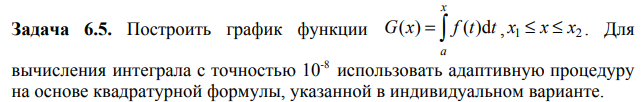

In [38]:
Image("6_5.png")

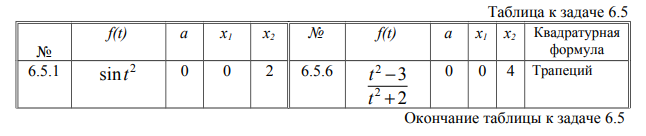

In [39]:
Image("6_5_2.png")

In [24]:
def f(x):
    return((x**2 - 3)/(x**2+2))
a = 0
def h_(x1, x, a, h, eps):
    I_tr = h/2 * (f(x1) + f(x1 + h))
    I_i = h/4 *(f(x1) + f(x1 + h) + 2*f((2*x1 + h)/2))
    eps1 = abs(1/3 * (I_tr - I_i))
    while(1):
        if(eps1 <= h * eps/(x-a)):
            break
        I_tr = h/2 * (f(x1) + f(x1 + h))
        I_i = h/4 *(f(x1) + f(x1 + h) + 2*f((2*x1 + h)/2))
        h = h/2
        eps1 = abs(1/3 * (I_tr - I_i))
        
    return(h)
        

def I_t(a, x, eps = 1e-6):
    t = [a]
    t_k = a
    I = 0
    h_0 = 0.0001
    h = h_0
    t.append(a+h_0)
    if (x == a):
        return(0)
    while(1):
        h = h_(t[-1], x, a, h_0, eps)
        if(t[-1] + h > x):
            break
        t.append(t[-1] + h)
        I += h/2 *(f(t[-1]) + f(t[-2]))
    h = x - t[-1]
    I += h/2 *(f(t[-1]) + f(t[-2]))
    return(I)

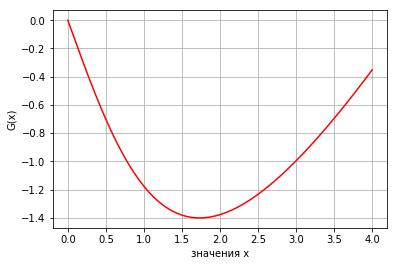

In [25]:
t_mas = np.arange(0,4.02,0.02)
y_mas = [I_t(a,s) for s in t_mas]
plt.plot(t_mas, y_mas, c = 'r')
plt.ylabel('G(x)')
plt.xlabel('значения x')
plt.grid()